In [99]:
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.dpi'] = 250
plt.rcParams['savefig.dpi'] = 250

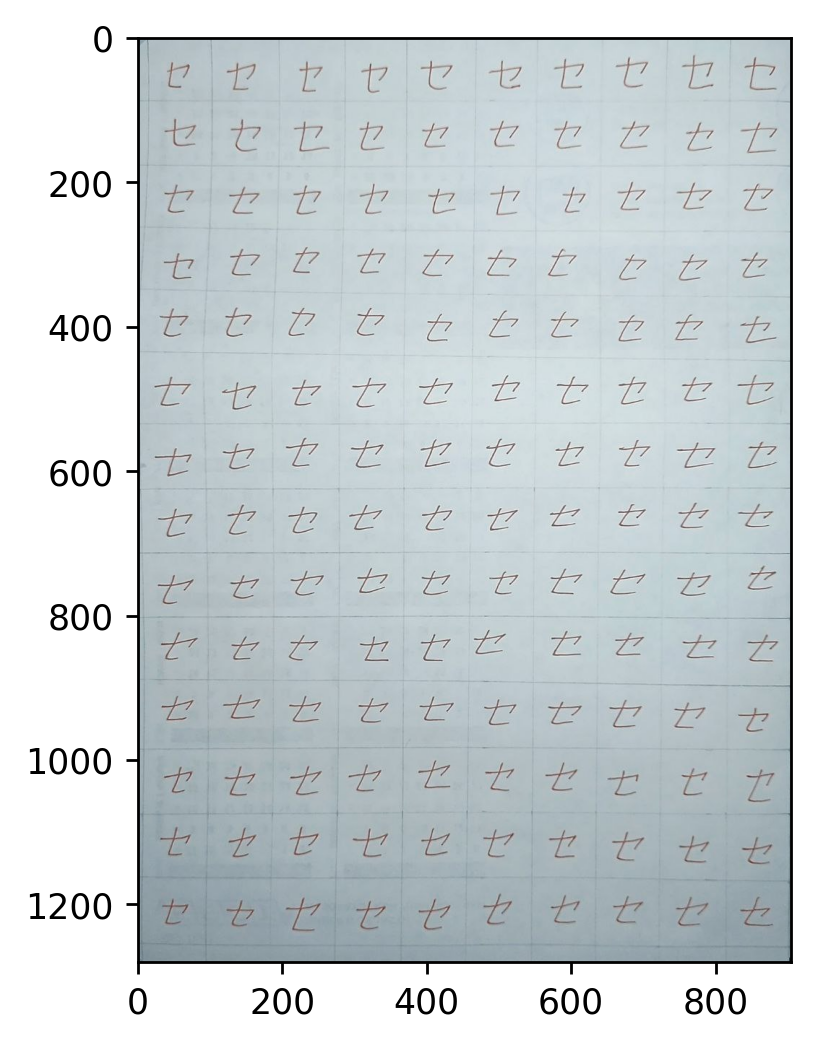

In [100]:
file_name = './data-raw/3.jpeg'
source_img = cv2.imread(file_name, cv2.IMREAD_COLOR)
plt.imshow(source_img)

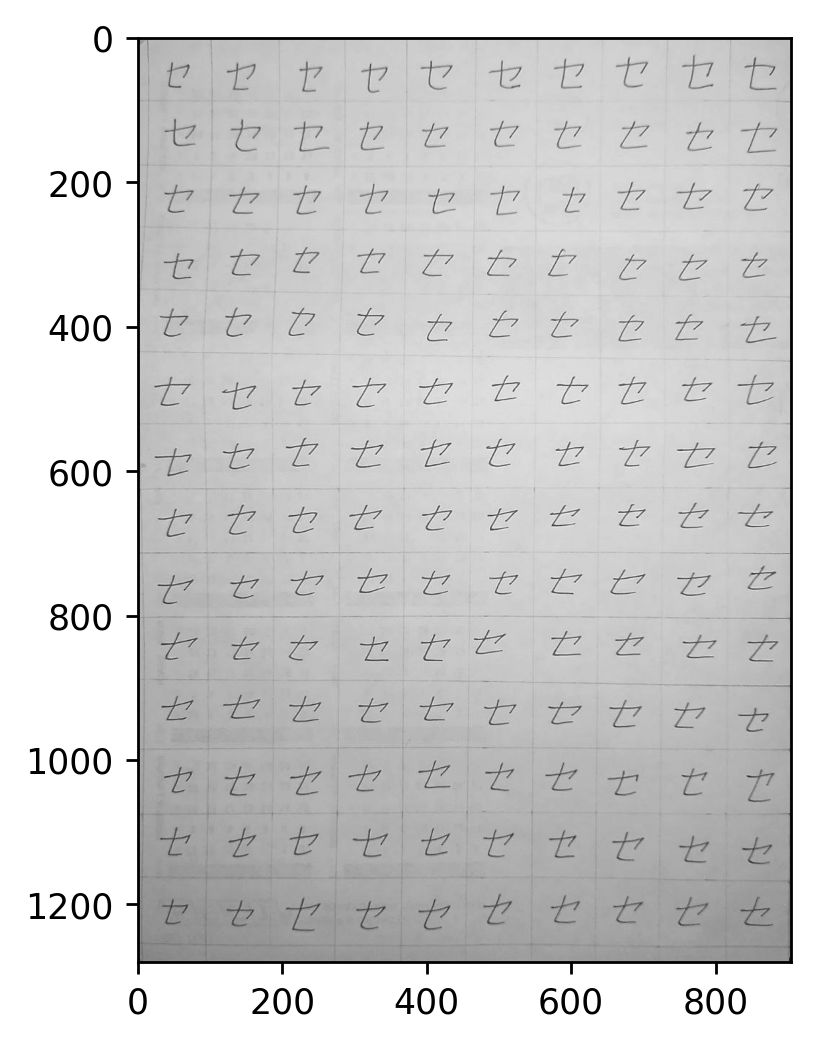

In [101]:
img = cv2.cvtColor(source_img, cv2.COLOR_BGR2GRAY)
h, w = img.shape
plt.imshow(img, cmap='gray')

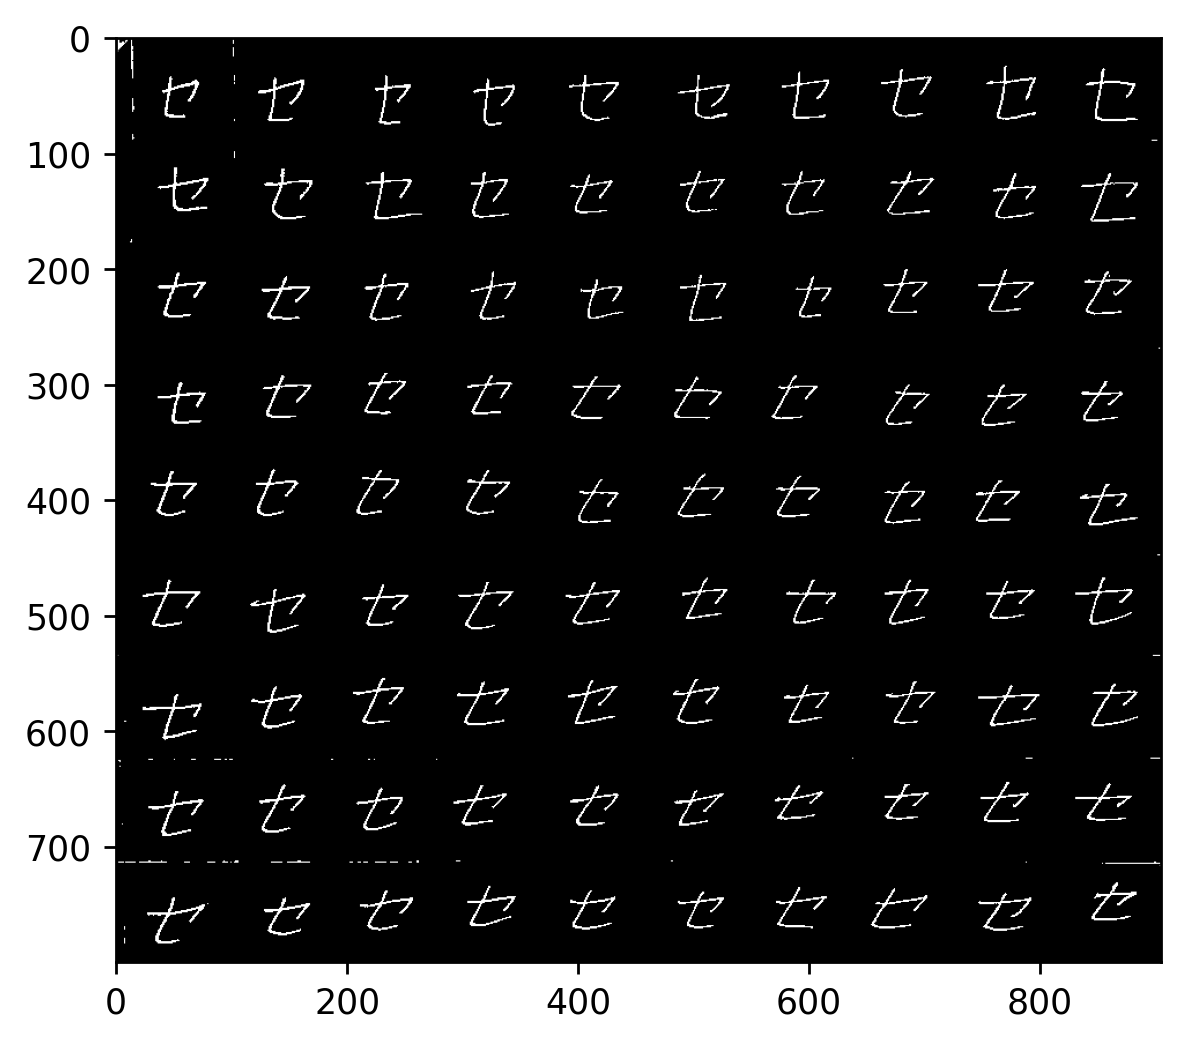

In [102]:
# первый ряд легче обработать отдельно, чтобы не потерять хвостики у символов
first_row = img[:800, :w]
_, first_row_bin = cv2.threshold(first_row, 165, 255, cv2.THRESH_BINARY_INV)
plt.imshow(first_row_bin , cmap='gray')

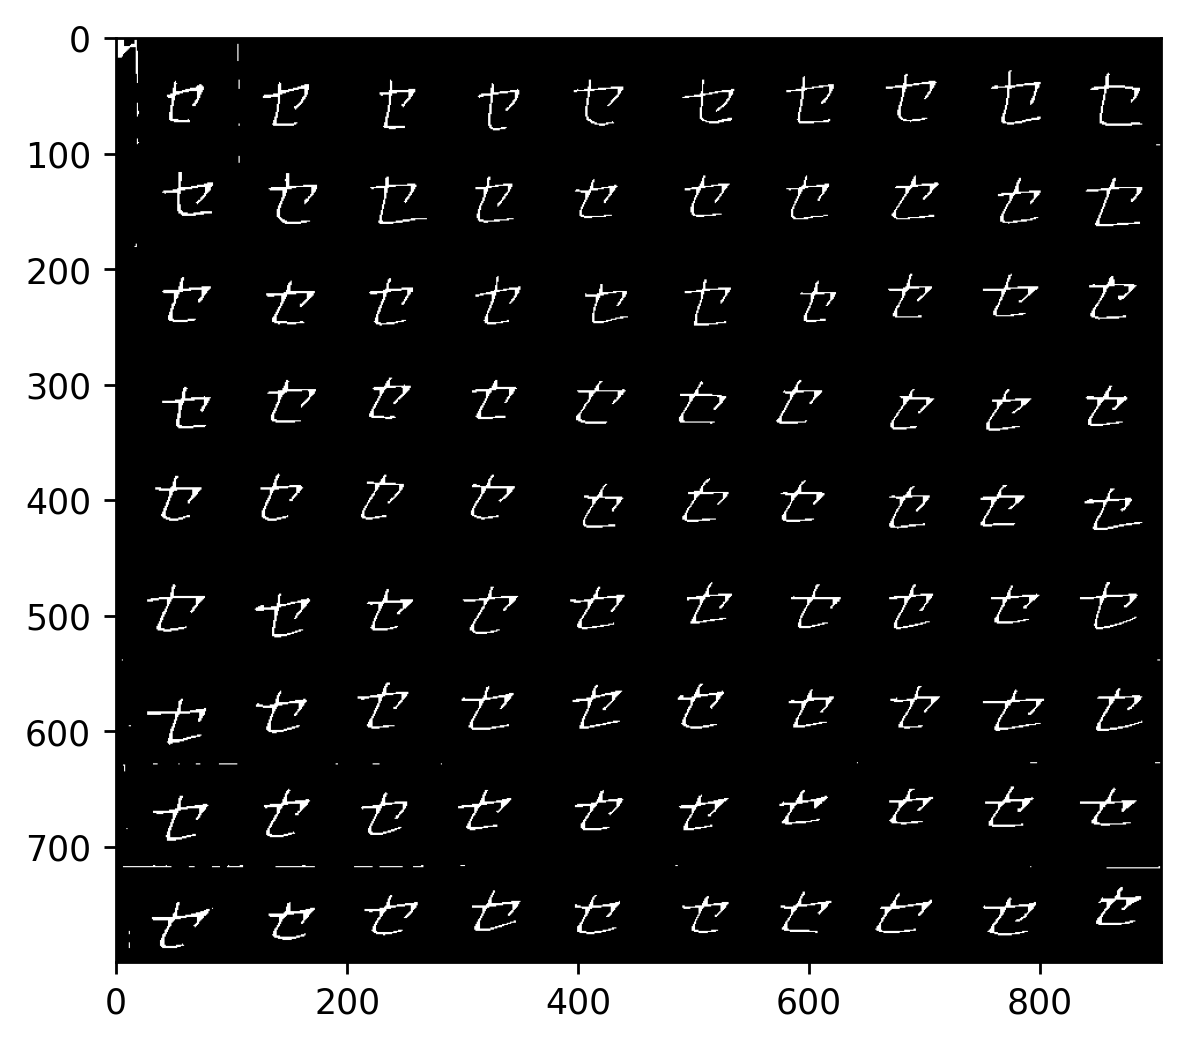

In [103]:
first_row_bin = cv2.morphologyEx(first_row_bin, cv2.MORPH_CLOSE, kernel=np.ones((2,2), np.uint8), iterations=4)
plt.imshow(first_row_bin, cmap='gray')

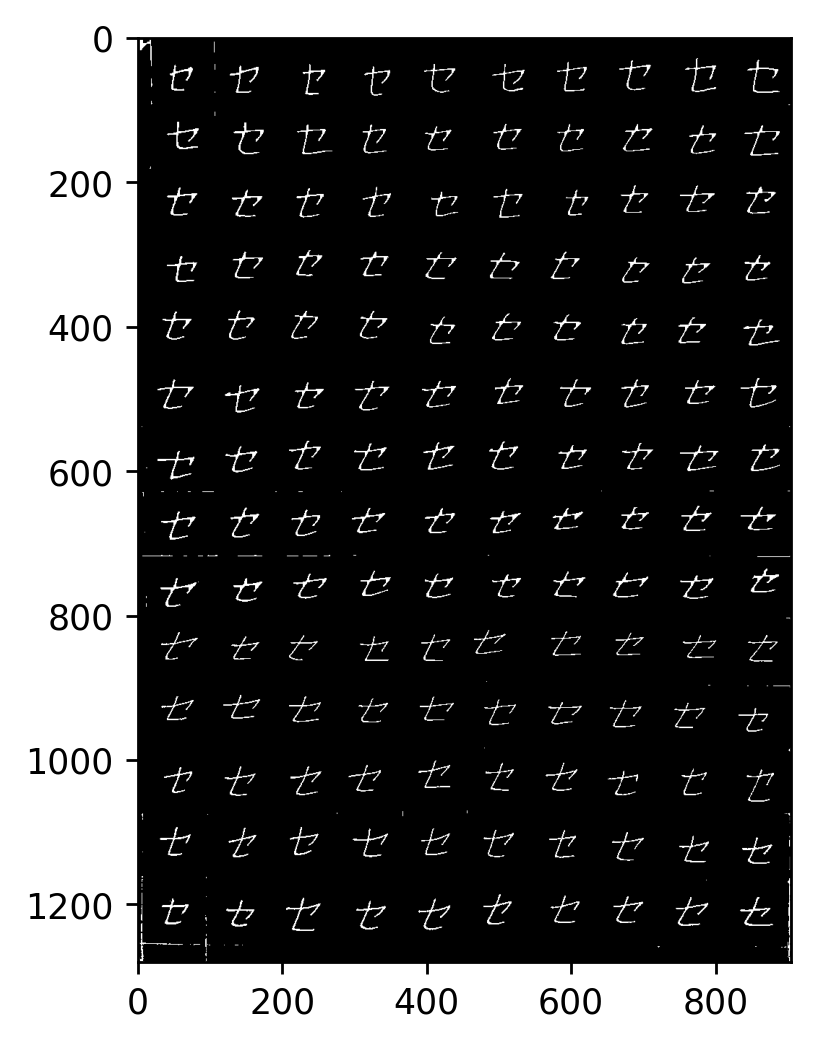

In [104]:
_, img_bin = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY_INV)
img_bin[:800, :w] = first_row_bin
plt.imshow(img_bin, cmap='gray')

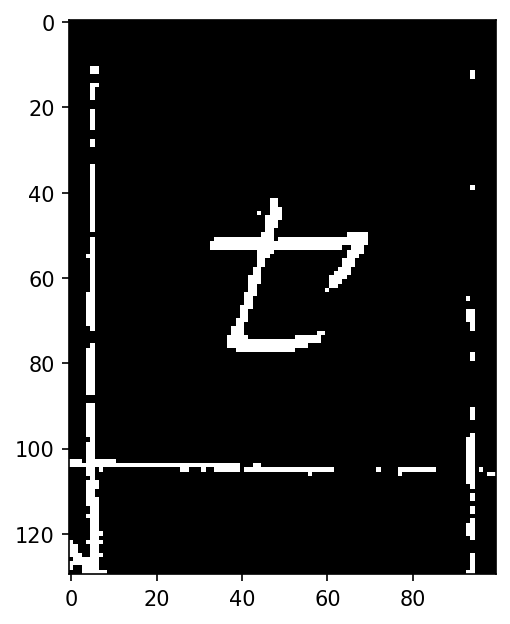

In [105]:
cropped = img_bin[1150:h, 0:100]

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

plt.imshow(cropped, cmap='gray')

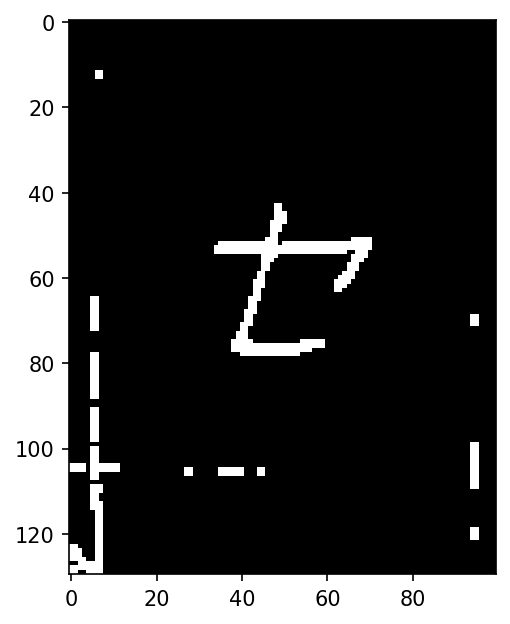

In [106]:
# чистим грязь
kernel = np.ones((2,2), np.uint8)
cropped = cv2.morphologyEx(cropped, cv2.MORPH_OPEN, kernel)
plt.imshow(cropped, cmap='gray')

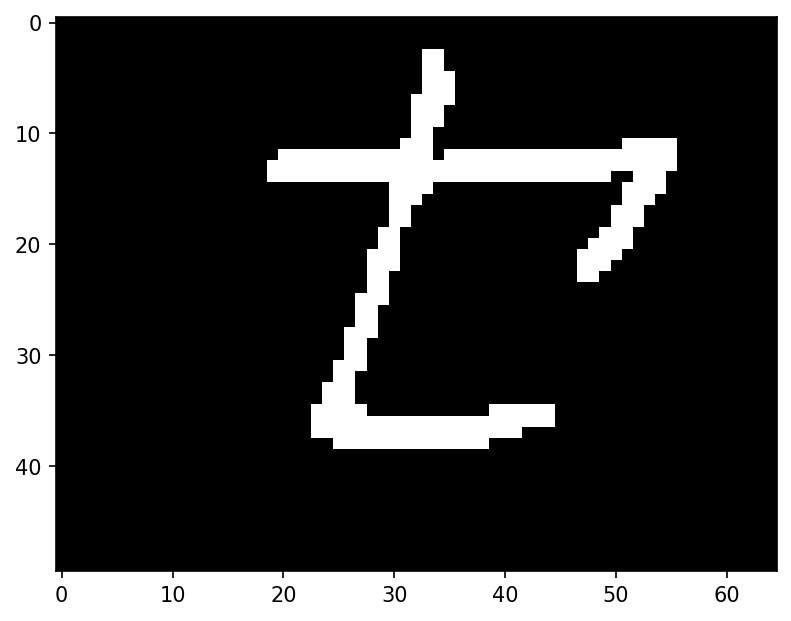

In [107]:
cropped_only_symbol = cropped[40:90, 15:80]
plt.imshow(cropped_only_symbol, cmap='gray')

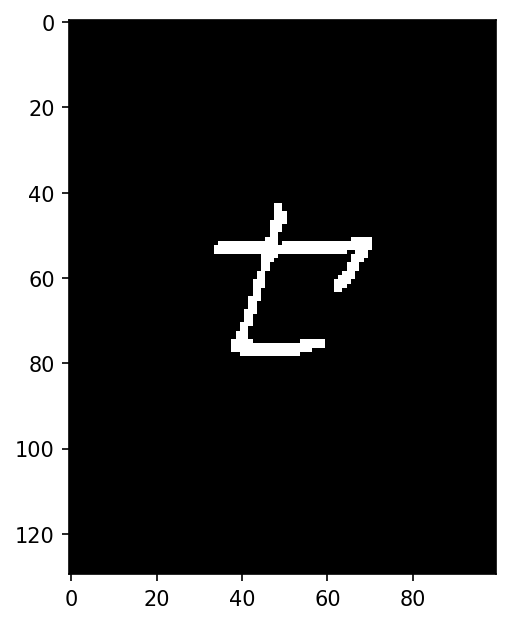

In [108]:
cleaned_cropped = np.zeros(cropped.shape, dtype="uint8") 
cleaned_cropped[40:90, 15:80] = cropped_only_symbol
plt.imshow(cleaned_cropped, cmap='gray')

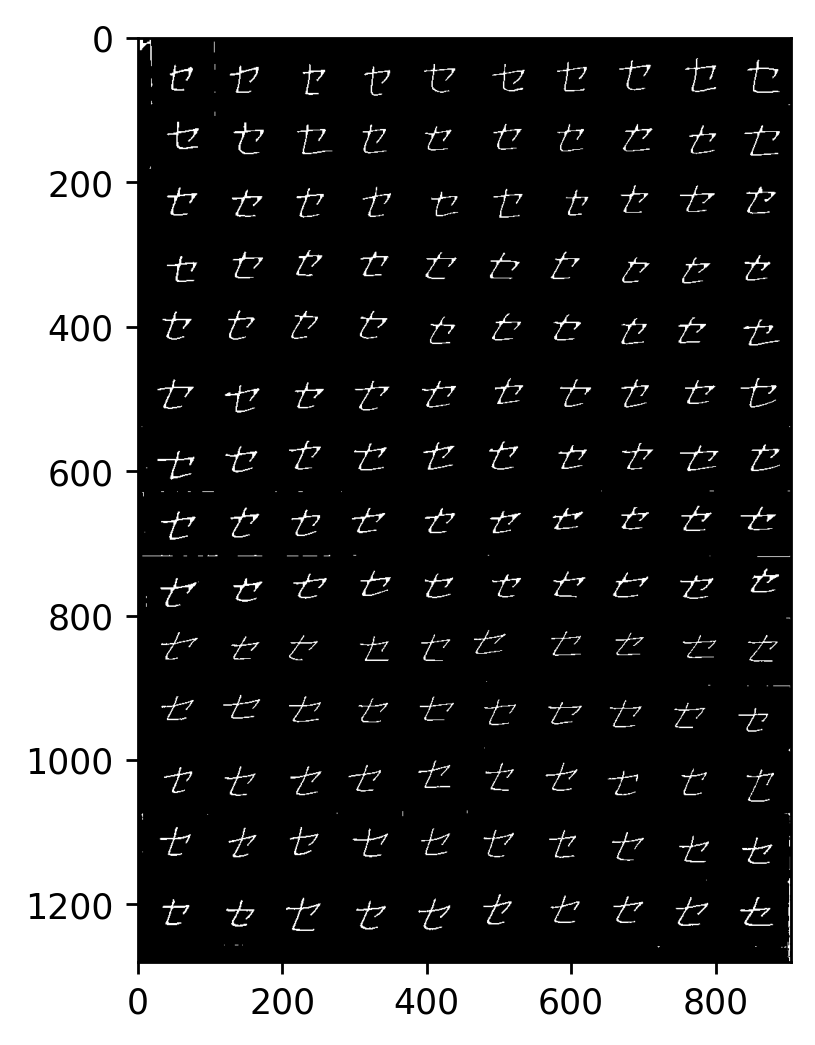

In [109]:
img_bin[1150:h, 0:100] = cleaned_cropped

plt.rcParams['figure.dpi'] = 250
plt.rcParams['savefig.dpi'] = 250
plt.imshow(img_bin, cmap='gray')

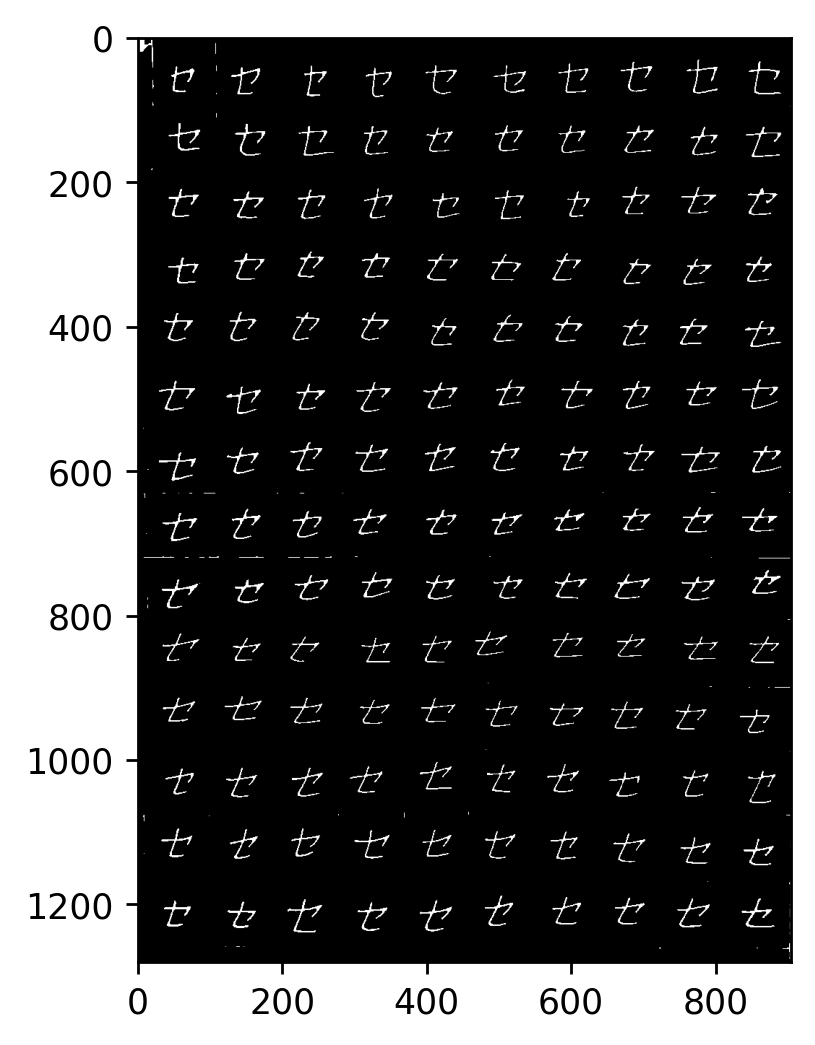

In [110]:
img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel=np.ones((2,2), np.uint8), iterations=2)
plt.imshow(img_bin, cmap='gray')

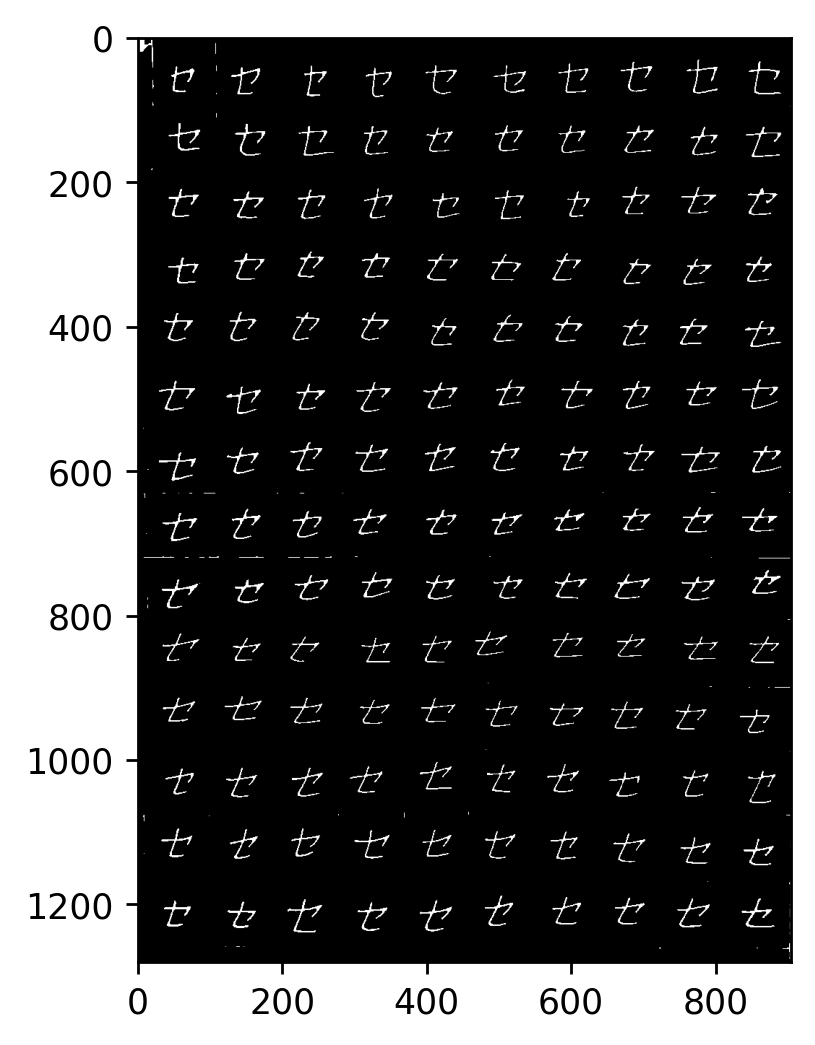

In [111]:
img_bin = cv2.erode(img_bin, kernel=np.ones((1,1), np.uint8), iterations=1)
plt.imshow(img_bin, cmap='gray')

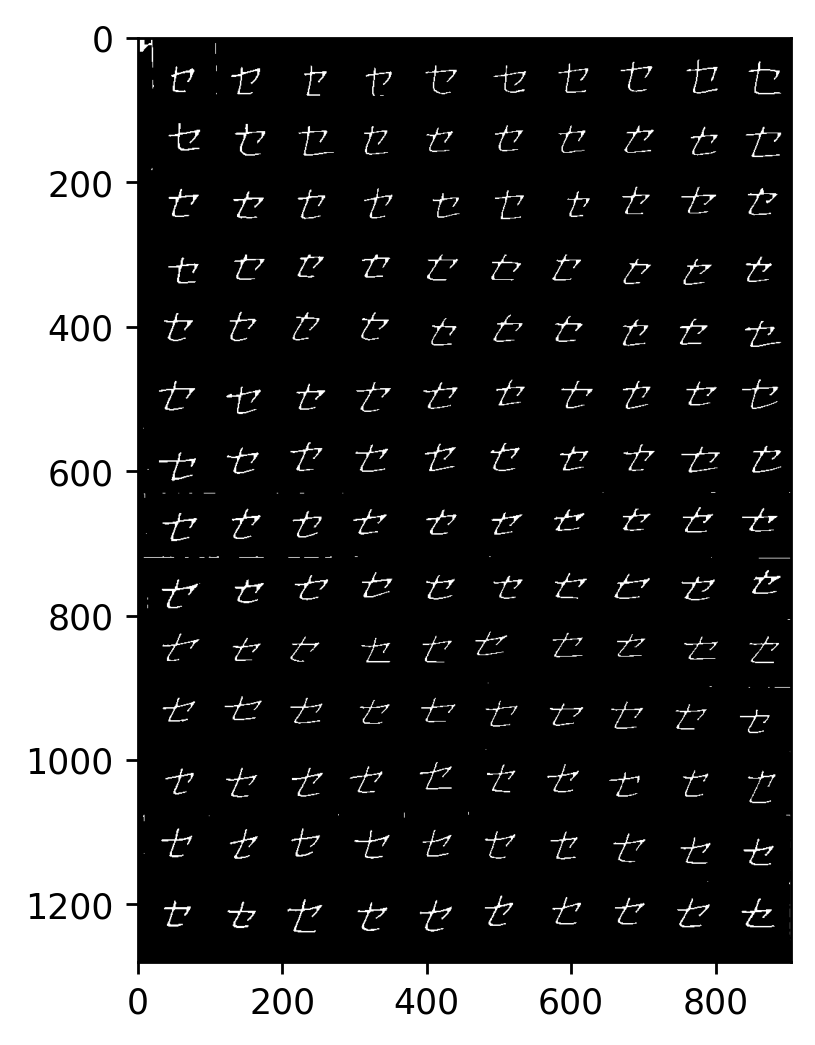

In [112]:
img_bin[1250:, :w] = 0
img_bin[80:110, :w] = 0
img_bin[290:300, :w] = 0
plt.imshow(img_bin, cmap='gray')

In [113]:
cv2.imwrite('./data-prepared/3.jpg', img_bin)

True